<a href="https://colab.research.google.com/github/human1abs/portfolio/blob/main/Stock-Price-Analysis-Granger-Causality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analysis of Stock-Price Time Series via Granger Causality

Granger causality occurs when events from a particular time series influence events from another time series happening at later points in time. It was developed by Clive Granger in 1969 as a tool to analyse cases and perform predictions in the field of economics. Nowadays, Granger causality is used in other fields, too - such as neuroscience.

A hypothetical example for using this concept is checking whether stock-price movements in one industry segment, say the automotive industry, are caused by stock-price movements in another industry segment - for example, the energy industry. If that is the case, it is assumed that the latter industry segment Granger-causes the former industry segment. This approach can be used for any number of time series - they don't necessarily need to be only two.

#### How Granger Causality works.
The Granger causality works by performing linear regressions on the data from time series X and time series Y, where past data of X and Y are used to create a prediction on future values of Y. Then, we perform a regression analysis with the same target using only past data of Y. The next step is comparing the results of both models. If errors of the combined model are significantly lower than the model which uses only past data of time series Y, then we assume that time series X Granger-causes time series Y.

It's very important to make the data in both time series comparable while making sure that time periods are stationary - that is, if the different time series have varying time periods, we need to make the necessary adjustments so that we can compare the values at the same moments in time. In this regard, lags are introduced - the values of each time period for both time series X and Y. The lag length the number of periods we use in the time series analysed. It's also important to mention that it might turn out that both time series can influence each other in the different time frames - it's not necessary for only one of them to influence the other one.

#### Limitations.
We should always keep in mind that Granger causality doesn't really imply the presence of actual causality. It is used for prediction of future events based on a specific patter of correlations, not as means to spot any causal relations. Correlation doesn't necessarily mean causation - the shift in values in the analysed time series can be caused by an external, confounding factor, or many other factors.

#### Example.

Let's take a look at one example. As copper is typically used for the production of wires and connectors in mobile phones, let's investigate whether the movements of the stock price of copper Granger-cause the change in the stock price of famous smartphone producer Apple.

The dataset, [downloaded freely from Kaggle](https://www.kaggle.com/datasets/saketk511/2019-2024-us-stock-market-data), shows the daily stock prices of major companies, the prices of major commodities as well as the most popular cryptocurrencies in the period from February 2019 to February 2024.

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from PIL import Image
from IPython.display import display

In [ ]:
np.random.seed(1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
us_stock_market = pd.read_csv("/content/drive/MyDrive/github_portfolio/Granger-Causality/stock_market_dataset.csv")
us_stock_market.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [ ]:
df_copper = us_stock_market[["Date","Copper_Price", "Apple_Price"]]
df_copper = df_copper.rename(columns={"Copper_Price": "copper", "Apple_Price": "apple"})
df_copper = df_copper.set_index('Date').rename_axis('company', axis=1)
df_copper = df_copper.loc[::-1]

In [ ]:
df_copper

company,copper,apple
Date,,
04-02-2019,2.7975,42.81
05-02-2019,2.8205,43.55
06-02-2019,2.8400,43.56
07-02-2019,2.8320,42.73
08-02-2019,2.8140,42.60
...,...,...
29-01-2024,3.8790,191.73
30-01-2024,3.9110,188.04
31-01-2024,3.9060,184.40


In [ ]:
fig = px.area(df_copper, facet_col="company", facet_col_wrap=1)
fig.for_each_annotation(lambda a: a.update(text=a.text.replace("company=", "")))
fig.update_yaxes(matches=None)
fig.show()

In [ ]:
def display_image(img_name):
  img_path = "/content/drive/MyDrive/github_portfolio/Granger-Causality/"+img_name
  img = Image.open(img_path)
  return display(img)

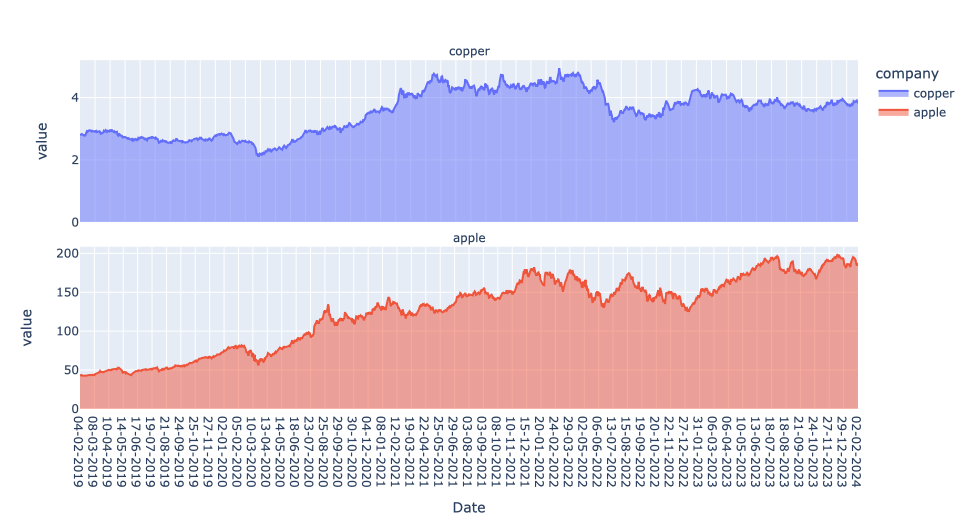

In [ ]:
display_image("newplot-4.png")

In [ ]:
fig = px.line(df_copper, facet_col="company", facet_col_wrap=1)
fig.for_each_annotation(lambda a: a.update(text=a.text.replace("company=", "")))
fig.update_yaxes(matches=None)
fig.show()

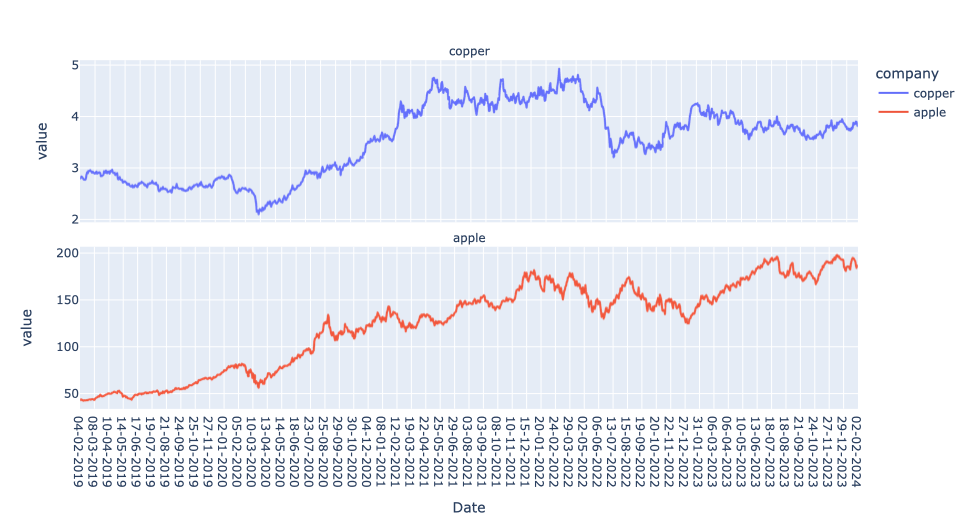

In [ ]:
display_image("newplot-8.png")

First, I had to perform tests for data stationarity. I started with an ADF test, which showed that the data is non-stationary. That was followed by a KPSS test, which checks for some hidden, or not so obvious stationarity in the data - for example whether the data is distributed in a certain pattern around a mean or there is some other linear trend. Not such a thing was found here - the data remained non-stationary.

In [ ]:
n_obs = 24
df_train, df_test = df_copper[0:-n_obs], df_copper[-n_obs:]

from statsmodels.tsa.stattools import adfuller

def adf_test(df):
    result = adfuller(df.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

print('ADF Test: Apple time series')
adf_test(df_train['apple'])
print('ADF Test: Copper time series')
adf_test(df_train['copper'])

ADF Test: Apple time series
ADF Statistics: -1.164097
p-value: 0.688846
Critical values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
ADF Test: Copper time series
ADF Statistics: -1.474682
p-value: 0.545996
Critical values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [ ]:
df_train

company,copper,apple
Date,,
04-02-2019,2.7975,42.81
05-02-2019,2.8205,43.55
06-02-2019,2.8400,43.56
07-02-2019,2.8320,42.73
08-02-2019,2.8140,42.60
...,...,...
21-12-2023,3.9175,194.68
22-12-2023,3.9050,193.60
26-12-2023,3.9020,193.05


In [ ]:
from statsmodels.tsa.stattools import kpss

def kpss_test(df):
    statistic, p_value, n_lags, critical_values = kpss(df.values)

    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')

print('KPSS Test: Apple time series')
kpss_test(df_train['apple'])
print('KPSS Test: Copper time series')
kpss_test(df_train['copper'])

KPSS Test: Apple time series
KPSS Statistic: 5.250959143837866
p-value: 0.01
num lags: 20
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: Copper time series
KPSS Statistic: 3.3440649172309502
p-value: 0.01
num lags: 20
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


<ipython-input-14-0b4837725f92>:4: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


<ipython-input-14-0b4837725f92>:4: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




Then I used the Difference method to transform the data so that it can be stationary. This was followed by performing the ADF and KPSS tests once again, to be sure. Luckily, both tests indicated stationarity this time, so I was approaching the final step - the Granger-causality test.

In [ ]:
df_train_transformed = df_train.diff().dropna()

fig = px.line(df_train_transformed, facet_col="company", facet_col_wrap=1)
fig.for_each_annotation(lambda a: a.update(text=a.text.replace("company=", "")))
fig.update_yaxes(matches=None)
fig.show()

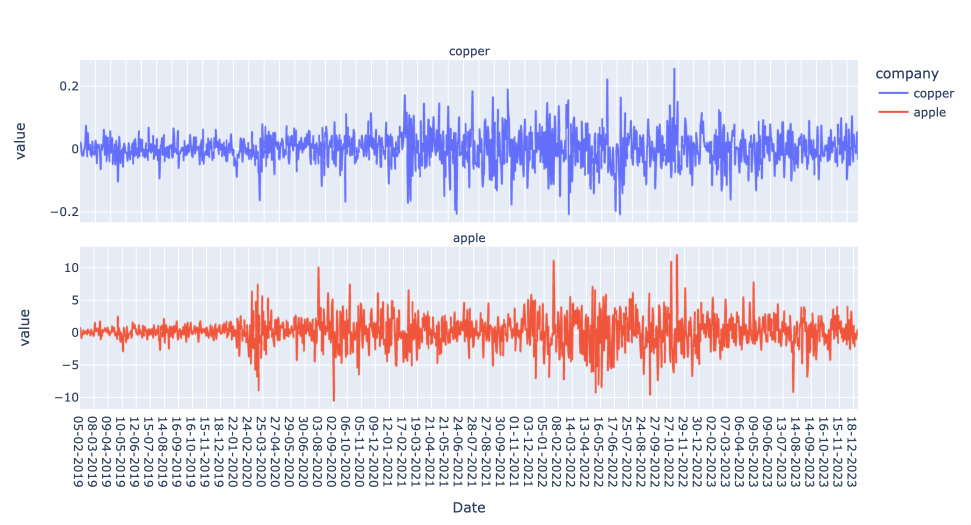

In [ ]:
display_image("newplot-10.png")

In [ ]:
print('ADF Test: Apple time series')
adf_test(df_train_transformed['apple'])
print('ADF Test: Copper time series')
adf_test(df_train_transformed['copper'])

ADF Test: Apple time series
ADF Statistics: -36.051658
p-value: 0.000000
Critical values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
ADF Test: Copper time series
ADF Statistics: -11.822520
p-value: 0.000000
Critical values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [ ]:
print('KPSS Test: Apple time series')
kpss_test(df_train_transformed['apple'])
print('KPSS Test: Copper time series')
kpss_test(df_train_transformed['copper'])

KPSS Test: Apple time series
KPSS Statistic: 0.04948914281284013
p-value: 0.1
num lags: 6
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
KPSS Test: Copper time series
KPSS Statistic: 0.09651244740829659
p-value: 0.1
num lags: 0
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


<ipython-input-14-0b4837725f92>:4: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


<ipython-input-14-0b4837725f92>:4: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [ ]:
len(df_train_transformed)

1218

To extract maximum value from the Granger-causality test, we need to define the optimal lag length. There are a number of ways that could help us, such as AIC or BIC but in this case they turned out to be similar for a large variety of lag lengths. Therefore, I decided to do it manually - just defined a ceiling for the lag lengths of 20 and ran an auto-regressive model for every possible case with lag lengths from 1 to 20.

I implemented the model "grangercausalitytests" from [statsmodels.org](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.grangercausalitytests.html). Then I calculated the average p-values regarding all the cases for the following Null-hypotheses:
- Apple stock price movements do not Granger-cause Copper prices;
- Copper prices do not Granger-cause Apple stock prices;
- Apple stock price movements do not Granger-cause themselves;
- Copper prices do not Granger-cause themselves.

Here, the first two Null-hypotheses for also mean that the alpha coefficients corresponding to past values of the second respective time series involved are zero. The analysis was performed under the assumption that p-values of below 0.05 are small enough to conclude rejection of the Null-hypotheses.

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

max_lag=20
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=max_lag)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(max_lag)]
            print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            avg_p_value = np.mean(p_values)
            df.loc[r, c] = avg_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df_train_transformed, variables = df_train_transformed.columns)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=1215, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=1
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=1
parameter F test:         F=0.0343  , p=0.8531  , df_denom=1215, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=1213, df_num=2
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=2
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=2
parameter F test:         F=2.2734  , p=0.1034  , df_denom=1213, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=1211, df_num=3
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=3
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=3
parameter F test:         F=1.7080  , p=0.1635  , df_denom=1211, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.0000  , p=1.

,copper_x,apple_x
copper_y,1.000000,0.011755
apple_y,0.013305,1.000000


In [ ]:
grangers_causation_matrix(df_train_transformed, variables = df_train_transformed.columns).to_csv('granger_matrix.csv', index=False)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=1215, df_num=1
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=1
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=1
parameter F test:         F=0.0343  , p=0.8531  , df_denom=1215, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=1213, df_num=2
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=2
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=2
parameter F test:         F=2.2734  , p=0.1034  , df_denom=1213, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0000  , p=1.0000  , df_denom=1211, df_num=3
ssr based chi2 test:   chi2=0.0000  , p=1.0000  , df=3
likelihood ratio test: chi2=-0.0000 , p=1.0000  , df=3
parameter F test:         F=1.7080  , p=0.1635  , df_denom=1211, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.0000  , p=1.

In [ ]:
granger_matrix = pd.read_csv('granger_matrix.csv')
granger_matrix

,copper_x,apple_x
0,1.000000,0.011755
1,0.013305,1.000000


The relationship between Copper and Apple stock prices is not surprising. Very important parts of all smartphones and many other electronic gadgets are made of copper. That the relationship goes both ways also shouldn't surprise us - Apple is a really substantial consumer of copper - even big enough to suggest that whatever happens at Apple sometimes has huge implications on many related parties.

On the other hand, one can argue that the observation of these two variables is not enough to form any categorical conclusions. After all they do not exist in a vacuum and are influenced by so many other variables - such as inflation, piece, economic growth, consumer sentiment, etc. All of them in this case can be considered as unmeasured confounders.